**Part 1.1 a - Read ‘Car name.csv’ as a DataFrame and
assign it to a variable.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data1= pd.read_csv('/content/Part1+-+Car+name.csv')
data1.head(2)

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320


**Ans 1.1 a:** Here we have read the 'car name.csv' file and save in data1 variable .

**Part 1.1 b - Read ‘Car-Attributes.json as a DataFrame
and assign it to a variable.**

In [2]:
data2= pd.read_json('/content/Part1+-+Car-Attributes.json')
data2.head(2)

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1


**Ans 1.1 b:** Here we have read the 'Car-Attributes.json' file and save in data2 variable.

**Part 1.1 c - Merge both the DataFrames together to
form a single DataFrame**

In [3]:
Merge_data = pd.merge(data1,data2,left_index=True, right_index=True, how='outer')
Merge_data.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


**Ans 1.1 c:** Here we are merging data1 and data2 dataframe in Merge_data over index basis.

**Part 1.1 d - Print 5 point summary of the numerical
features and share insights.**

In [4]:
Merge_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


**Ans 1.1 d:** Here we use 'describe()' function for showing 5 point summary of the numerical feature

**Part 1.2 a - Check and print feature-wise percentage of
missing values present in the data and impute with the
best suitable approach.**


In [5]:
Merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


As we can see their is no null available Since each column has 398 non null rows .

In [6]:
for column in Merge_data.columns:
    if Merge_data[column].dtype == 'object':
        Merge_data[column].fillna(Merge_data[column].mode()[0], inplace=True)
    else:
        Merge_data[column].fillna(Merge_data[column].mean(), inplace=True)

Merge_data.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


Although no null value available in data sheet , If their is any then we can impute them from above method

**Part 1.2 b - Check for duplicate values in the data and
impute with the best suitable approach**

In [9]:
Merge_data.duplicated().sum()


0

In [10]:
Merge_data.drop_duplicates()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


**Ans 1.2 b:** Here we have checked the duplicate row in dataframe .
Some we have zero duplicate rows . if we have we can drop it through drop_duplicates() function.

**Part 1.2 c - Plot a pairplot for all features**

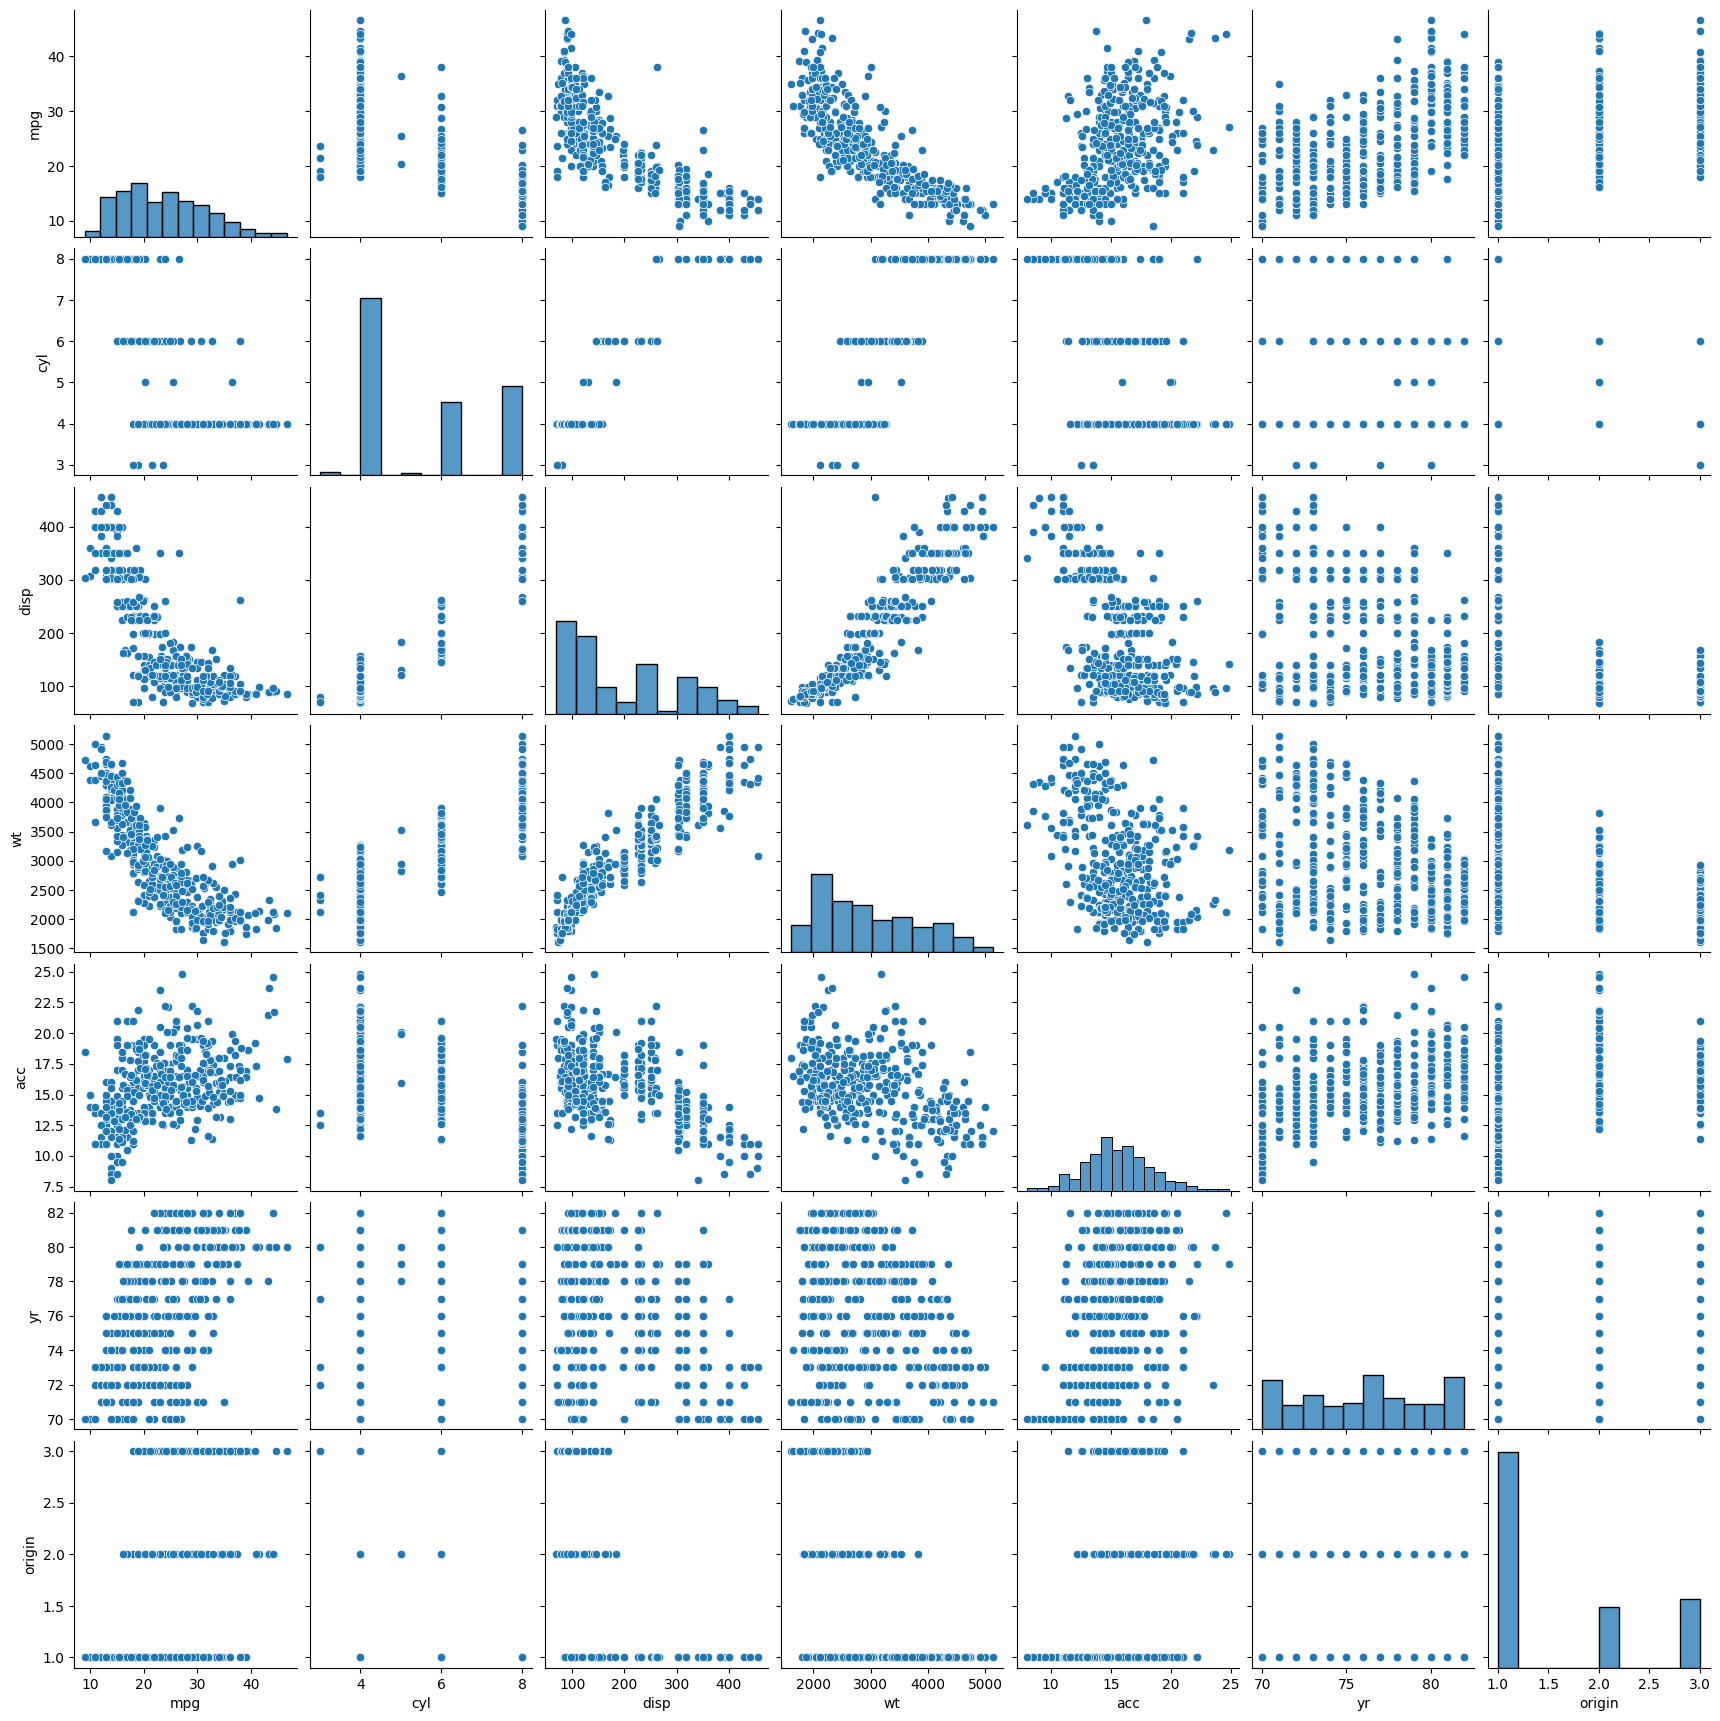

In [8]:
sns.pairplot(data=Merge_data)

**Part 1.2 d - Visualize a scatterplot for ‘wt’ and ‘disp’.
Datapoints should be distinguishable by ‘cyl’.**

<Axes: xlabel='wt', ylabel='disp'>

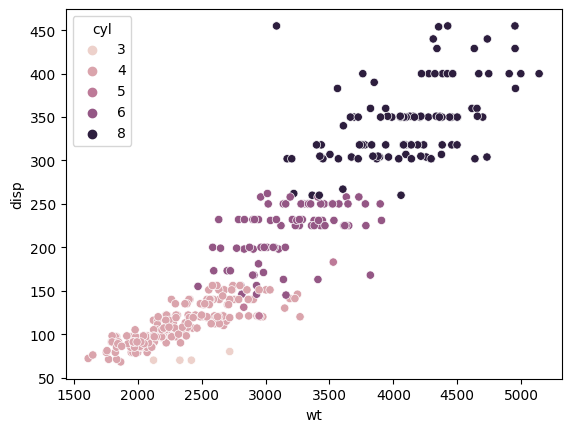

In [11]:
sns.scatterplot(data= Merge_data, x= Merge_data['wt'],y =Merge_data['disp'] ,hue =Merge_data['cyl'])

**Part 1.2 e - Share insights for Q2.d.**

**Ans 1.2e.** As per above scatterplot as 'wt' increases 'mpg' got increasing gradually , so we can say they are  proportional.
Also we can see as 'wt' increasing the 'cly' also increasing

**Part 1.2 f - Visualize a scatterplot for ‘wt’ and ’mpg’.
Datapoints should be distinguishable by ‘cyl’.**

<Axes: xlabel='wt', ylabel='mpg'>

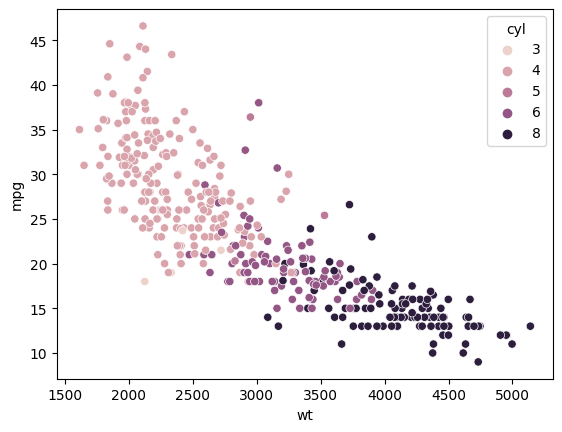

In [12]:
sns.scatterplot(data= Merge_data, x= Merge_data['wt'],y =Merge_data['mpg'] ,hue =Merge_data['cyl'])

**Part 1.2 g- Share insights for Q2.f.**

**Ans 1.2 g:** As per above scatterplot as 'wt' increases 'mpg' got decreasing gradually , so we can say they are inversely proportional.
Also we can see as 'wt' increasing the 'cly' also increasing.

**Part 1.2 h - Check for unexpected values in all the
features and datapoints with such values.**

In [13]:
#Since hp should contain numeric value only but it is showing object type , so we need to check unique value of 'hp' column

a=Merge_data['hp'].unique()
print('hp',':')
print(a)
print('\n')

hp :
[130 165 150 140 198 220 215 225 190 170 160 95 97 85 88 46 87 90 113 200
 210 193 '?' 100 105 175 153 180 110 72 86 70 76 65 69 60 80 54 208 155
 112 92 145 137 158 167 94 107 230 49 75 91 122 67 83 78 52 61 93 148 129
 96 71 98 115 53 81 79 120 152 102 108 68 58 149 89 63 48 66 139 103 125
 133 138 135 142 77 62 132 84 64 74 116 82]




In [15]:
Merge_data['hp'].replace('?',np.nan,inplace = True)
Merge_data.dropna(inplace = True)
Merge_data.shape

(392, 9)

**Ans 1.2 h :** Since we have found that in 'hp' feature their is unexpected value '?' we will replace it with 'nan' and then drop nan  contain rows .

**Part 1.3 a - Apply K-Means clustering for 2 to 10
clusters.**

In [16]:
from scipy.stats import zscore
Seperate_column = Merge_data.iloc[:,1:]
SD = Seperate_column.apply(zscore)

In [17]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
clusters =range(2,11)
meanDistortions=[]
for k in clusters:
  model = KMeans(n_clusters=k)
  model.fit(SD)
  prediction=model.predict(SD)
  meanDistortions.append(sum(np.min(cdist(SD,model.cluster_centers_,'euclidean'),axis=1))/SD.shape[0])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

**Part 1.3 b - Plot a visual and find elbow point.**

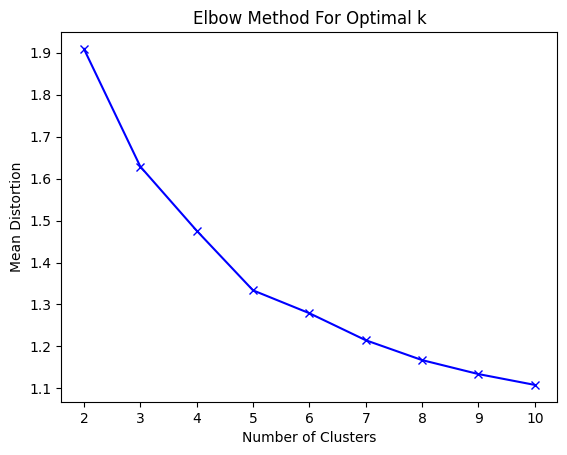

In [23]:
plt.plot(clusters,meanDistortions,'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

**Part 1.3 c - On the above visual, highlight which are
the possible Elbow points.**

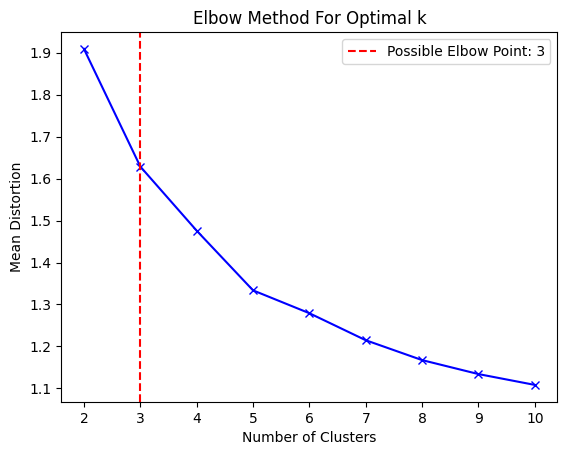

In [25]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Distortion')
plt.title('Elbow Method For Optimal k')

derivative = np.diff(meanDistortions, 2)
elbow_point = clusters[np.argmax(derivative) + 1]

plt.axvline(x=elbow_point, color='red', linestyle='--', label=f'Possible Elbow Point: {elbow_point}')
plt.legend()

plt.show()

**Part 1.3 d - Train a K-means clustering model once
again on the optimal number of clusters.**

In [30]:
optimal_k = 3
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_kmeans.fit(SD)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

**Part 1.3 e - Add a new feature in the DataFrame which
will have labels based upon cluster value**

In [31]:
prediction=final_kmeans.predict(SD)
Merge_data['Group']=prediction
SD['Group']=prediction
Merge_data

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Group
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,0
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,0
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1,2
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2,1
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1,1
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1,2


**Part 1.3 f -Plot a visual and color the datapoints based
upon clusters.**

array([[<Axes: title={'center': 'acc'}, xlabel='[Group]'>,
        <Axes: title={'center': 'cyl'}, xlabel='[Group]'>,
        <Axes: title={'center': 'disp'}, xlabel='[Group]'>],
       [<Axes: title={'center': 'hp'}, xlabel='[Group]'>,
        <Axes: title={'center': 'mpg'}, xlabel='[Group]'>,
        <Axes: title={'center': 'origin'}, xlabel='[Group]'>],
       [<Axes: title={'center': 'wt'}, xlabel='[Group]'>,
        <Axes: title={'center': 'yr'}, xlabel='[Group]'>, <Axes: >]],
      dtype=object)

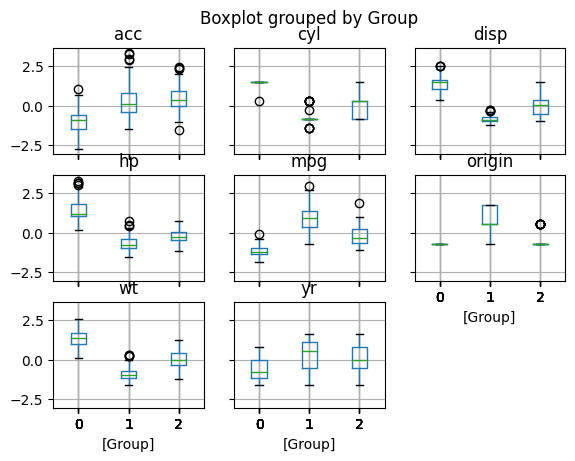

In [45]:
techsuppclust= Merge_data.groupby(['Group'])
SD.boxplot(by='Group')

**Part 1.3 g - Pass a new DataPoint and predict which
cluster it belongs to**

In [49]:
new_row = {'mpg':20,'cyl':6, 'disp':300, 'hp':140,'wt' :2800, 'acc':12,'yr':70,'origin':1}

new_row_df = pd.DataFrame([new_row])
new_row_standardized = (new_row_df - Seperate_column.mean()) / Seperate_column.std()

predicted_cluster = model.predict(new_row_standardized)

print(f'The new data point belongs to Cluster {predicted_cluster[0]}')

The new data point belongs to Cluster 1


**Part 2. 1 a - Read ‘vehicle.csv’ and save as
DataFrame.**

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
vehicle = pd.read_csv('/content/vehicle.csv')
vehicle.head(2)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van


**Ans 2.1.a** Here we have read 'vehicle.csv' file and save in 'vehicle' variable dataframe .

**Part 2.1 b- Check percentage of missing values and
impute with correct approach.**

In [51]:
vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [52]:
missing_percentage = vehicle.isnull().mean() * 100
print("Percentage of Missing Values:")
print(missing_percentage)

Percentage of Missing Values:
compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64


In [53]:
for column in vehicle.columns:
    if vehicle[column].dtype == 'object':
        vehicle[column].fillna(vehicle[column].mode()[0], inplace=True)
    else:
        vehicle[column].fillna(vehicle[column].mean(), inplace=True)

vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


**Ans 2.1.b:** Here we have check for null values available in each column with info then we have find percentage as per question asked for .
Then we impute it with correct value numerical column to mean and categorical column to mode value.

**Part 2.1 c- Visualize a Pie-chart and print percentage
of values for variable ‘class’.**

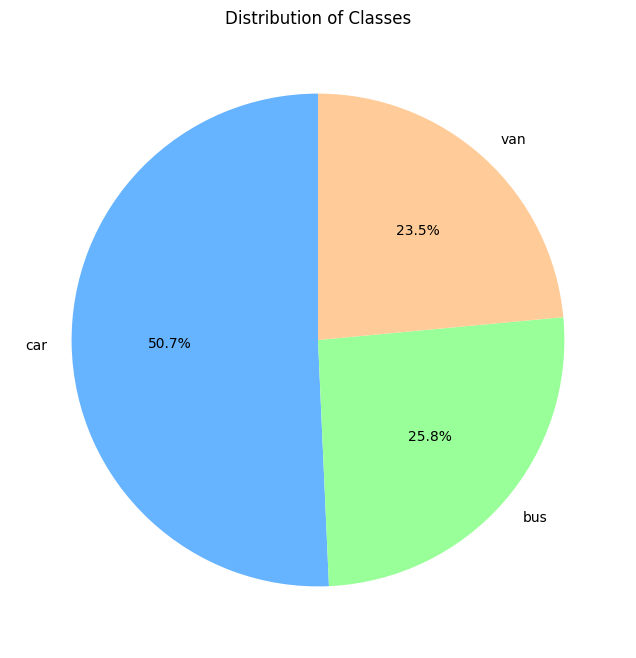

Percentage of values for variable 'class':
car    50.709220
bus    25.768322
van    23.522459
Name: class, dtype: float64


In [57]:
class_counts = vehicle['class'].value_counts()
total_samples = len(vehicle)
class_percentages = class_counts / total_samples * 100

plt.figure(figsize=(8, 8))
plt.pie(class_percentages, labels=class_percentages.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribution of Classes')
plt.show()

print("Percentage of values for variable 'class':")
print(class_percentages)

**Part 2.1 d - Check for duplicate rows in the data and
impute with correct approach.**

In [58]:
vehicle.duplicated().sum()

0

**Ans 2.1 d:** Here by using duplicated() function we have check the no of duplicate rows ,which is 0.

**Part 2.2 a - Split data into X and Y.**

In [59]:
X = vehicle.drop('class', axis=1)
Y = vehicle['class']

**Ans 2.2a** Here we have divide the data in X and Y

**Part 2.2 b - Standardize the Data**

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_standardized = scaler.fit_transform(X)

print("Standardized Features (X):")
print(X_standardized)

Standardized Features (X):
[[ 0.16058035  0.51730193  0.05654535 ...  0.38066534 -0.31219283
   0.18395733]
 [-0.32546965 -0.62456401  0.12011169 ...  0.15658856  0.01308823
   0.45297703]
 [ 1.25419283  0.84354934  1.51857115 ... -0.40360337 -0.1495523
   0.04944748]
 ...
 [ 1.49721783  1.49604417  1.20073946 ... -0.96379531 -0.31219283
   0.72199673]
 [-0.93303214 -1.44018254 -0.26128634 ...  1.38901082  0.17572877
  -0.08506238]
 [-1.05454464 -1.44018254 -1.02408241 ...  0.60474211 -0.47483337
  -0.75761164]]


**Part 2.3 a - Train a base Classification model using
SVM.**

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', C=1.0)

svm_model.fit(X_train, Y_train)

Y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9352941176470588


**Part 2.3 b - Print Classification metrics for train data.**

In [62]:
from sklearn.metrics import classification_report
Y_train_pred = svm_model.predict(X_train)

print("Classification Report for Train Data:")
print(classification_report(Y_train, Y_train_pred))

Classification Report for Train Data:
              precision    recall  f1-score   support

         bus       0.98      0.98      0.98       166
         car       0.99      0.99      0.99       351
         van       1.00      0.99      1.00       159

    accuracy                           0.99       676
   macro avg       0.99      0.99      0.99       676
weighted avg       0.99      0.99      0.99       676



**Part 2.3 c - Apply PCA on the data with 10
components**

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_standardized)

print("Explained Variance Ratio :")
print(pca.explained_variance_ratio_)

print("\nCumulative Variance:")
print(np.cumsum(pca.explained_variance_ratio_))

Explained Variance Ratio :
[0.52206485 0.16736054 0.10562382 0.0654932  0.05089389 0.02992458
 0.01989681 0.01229998 0.00888039 0.0050892 ]

Cumulative Variance:
[0.52206485 0.68942539 0.79504921 0.86054241 0.9114363  0.94136087
 0.96125769 0.97355767 0.98243806 0.98752726]


**Part 2.3 d - Visualize Cumulative Variance Explained
with Number of Components**

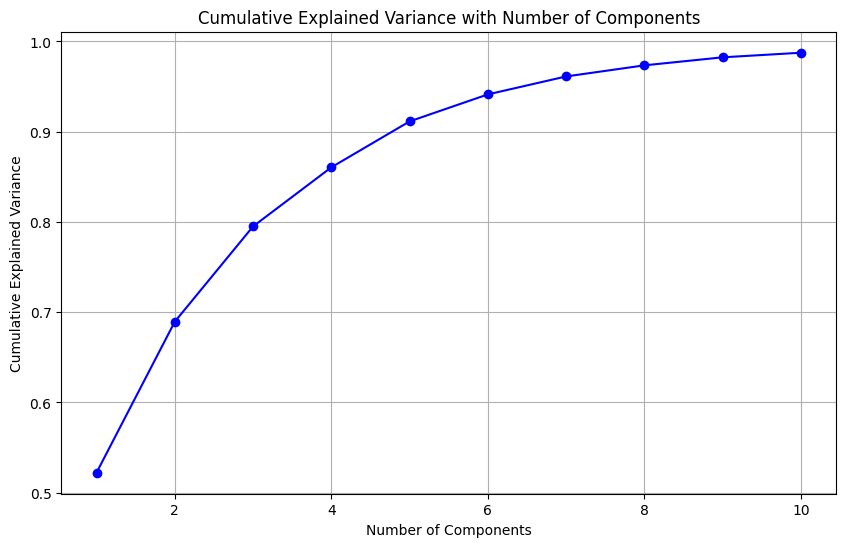

In [64]:
import matplotlib.pyplot as plt
import numpy as np

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance with Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

**Part 2.3 e - Draw a horizontal line on the above plot to
highlight the threshold of 90%.**

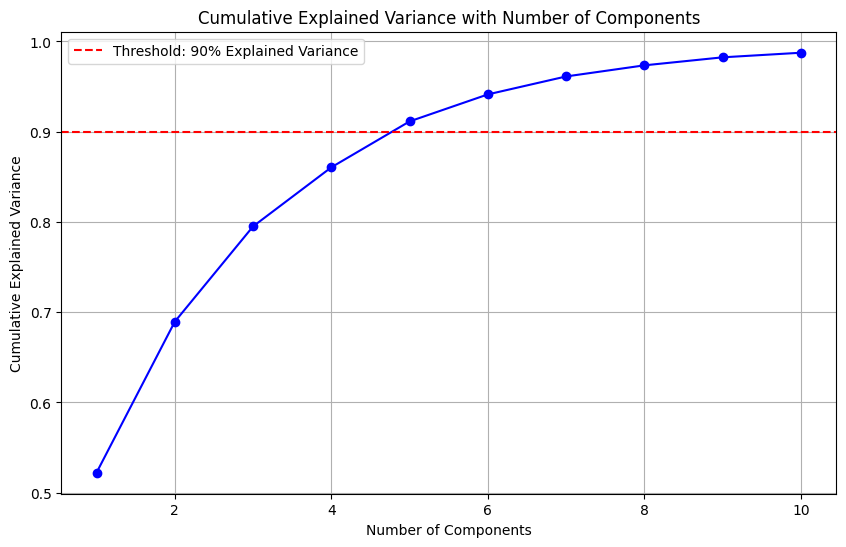

In [65]:
import matplotlib.pyplot as plt
import numpy as np
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.axhline(y=0.9, color='r', linestyle='--', label='Threshold: 90% Explained Variance')
plt.title('Cumulative Explained Variance with Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

**Part 2.3 f - Apply PCA on the data. This time Select
Minimum Components with 90% or above variance
explained.**

In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_standardized)

print("Number of Components Selected:", pca.n_components_)

Number of Components Selected: 5


**Part 2.3 g - Train SVM model on components selected
from above step.**

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_standardized)

X_train_pca, X_test_pca, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

svm_model_pca = SVC(kernel='linear', C=1.0)

svm_model_pca.fit(X_train_pca, Y_train)

Y_pred_pca = svm_model_pca.predict(X_test_pca)

accuracy_pca = accuracy_score(Y_test, Y_pred_pca)
print("Accuracy with PCA:", accuracy_pca)

Accuracy with PCA: 0.6411764705882353


**Part 2.3 h - Print Classification metrics for train data of
above model and share insights.**

In [68]:
from sklearn.metrics import classification_report

Y_train_pred_pca = svm_model_pca.predict(X_train_pca)

print("Classification Report for Train Data with PCA:")
print(classification_report(Y_train, Y_train_pred_pca))

Classification Report for Train Data with PCA:
              precision    recall  f1-score   support

         bus       0.59      0.55      0.57       166
         car       0.77      0.83      0.80       351
         van       0.57      0.50      0.54       159

    accuracy                           0.68       676
   macro avg       0.64      0.63      0.63       676
weighted avg       0.68      0.68      0.68       676



**Part 2.4 a - Train another SVM on the components out
of PCA. Tune the parameters to improve performance.**

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train_pca, X_test_pca, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

svm_model = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_pca, Y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_svm_model = SVC(**best_params)
best_svm_model.fit(X_train_pca, Y_train)

Y_pred_best_svm = best_svm_model.predict(X_test_pca)

accuracy = accuracy_score(Y_test, Y_pred_best_svm)
print("Accuracy:", accuracy)

Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.788235294117647


**Part 2.4 b- Share best Parameters observed from
above step.**

In [70]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


**Part 2.4 c- Print Classification metrics for train data of
above model and share relative improvement in
performance in all the models along with insights.**

In [71]:
from sklearn.metrics import classification_report

Y_train_pred_tuned_svm = best_svm_model.predict(X_train_pca)

# Print classification report
print("Classification Report for Train Data with Tuned SVM:")
print(classification_report(Y_train, Y_train_pred_tuned_svm))


Classification Report for Train Data with Tuned SVM:
              precision    recall  f1-score   support

         bus       0.92      0.91      0.92       166
         car       0.94      0.96      0.95       351
         van       0.93      0.89      0.91       159

    accuracy                           0.93       676
   macro avg       0.93      0.92      0.92       676
weighted avg       0.93      0.93      0.93       676



**Ans 2.4 c:** As in SVM model accuracy  was 99% approx of train data which show that it is overfitted .then we apply PCA on data and train again with svm but accouracy of that modal is very low still 68% only .
Then we choose best perameters through grid search which improve our data accuracy alot and now accuracy is 93%.

**2.5 A. Explain pre-requisite/assumptions of PCA. [2 Marks]**

**Ans2.5 A.** Here are some key prerequisites and assumptions for PCA:

Numeric Data: PCA is designed for numeric data.So we can encode the column which contain categorical value .

Linear Relationship: PCA assumes that the relationship between variables is linear.

Zero or Constant Variance: PCA works best when variables have non-zero and varying variances.

Standardization: It is necessary to standardize the variables before applying PCA. Standardization involves transforming variables to have a mean of 0 and a standard deviation of 1. This ensures that variables with larger scales do not dominate the analysis.

Orthogonality: Principal components (PCs) produced by PCA are uncorrelated.

Large Variance Captured by Early PCs: PCA assumes that the first few principal components capture the majority of the variance in the data. This allows for dimensionality reduction by retaining only the most important components.

Normality :PCA is often more effective when the data is approximately normally distributed.


Large Sample Size: PCA tends to perform better with a larger sample size. As a rule of thumb, a sample size of at least five times the number of variables is often recommended.

**Part 2.5 b - Explain advantages and limitations of PCA.**

**Ans 2.5 b:**

Advantages of PCA:

* Dimensionality Reduction: PCA reduces the dimensionality of the dataset
by transforming it into a new set of uncorrelated variables (principal components) while retaining most of the original variability.

* Data Visualization: PCA simplifies complex datasets and facilitates visualization by representing data in a lower-dimensional space. This can be valuable for understanding patterns and relationships in the data.

* Noise Reduction: PCA tends to reduce the impact of noise and irrelevant features, focusing on the dominant patterns in the data. It can enhance signal-to-noise ratios in certain scenarios.

* Collinearity Handling: PCA addresses multicollinearity issues by creating orthogonal (uncorrelated) components, making it easier to identify the true relationships among variables.

* Improved Model Performance: In machine learning, using PCA as a preprocessing step can improve the performance of models by eliminating redundant information and focusing on the most informative features.

Limitations of PCA:

* Linearity Assumption: PCA assumes a linear relationship between variables. If the underlying relationships are nonlinear, PCA may not capture the full complexity of the data.

* Interpretability: The interpretability of principal components may be challenging, especially when dealing with a large number of variables. The components are linear combinations of the original variables and may not have clear real-world meaning.

* Sensitive to Outliers: PCA is sensitive to outliers, as the principal components are influenced by extreme values. Outliers can significantly impact the results.

* Assumes Gaussian Distribution: PCA works optimally when the data follows a Gaussian distribution. If the data is highly skewed or does not meet normality assumptions, alternative techniques might be more suitable.

* Loss of Information: While PCA retains most of the variability, there is inevitably some loss of information. The trade-off between dimensionality reduction and information preservation should be carefully considered.

* Data Scaling Sensitivity: PCA is sensitive to the scale of the variables. Standardization is often recommended, and the interpretation of component loadings can be influenced by variable scaling.

* Non-Orthogonal Features: If the assumption of orthogonal (uncorrelated) principal components is not met, the interpretability and effectiveness of PCA may be compromised.